In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as datetime
from pandas import Period

original = pd.read_csv('df_harry_potter_trailer_2008-2013/df_youtube_harry potter trailer_2008-2013.csv')
df = original.copy()

In [2]:
df = df.fillna(0)
df

,Unnamed: 0,id,viewCount,likeCount,dislikeCount,commentCount,publishedAt,title,channelTitle,publishTime
0,0,71K8yDAgogI,92152.0,77.0,4.0,14.0,2008-01-01T15:25:22.000Z,Trailer de Video Game - HP e a Câmara Secreta ...,GabrielRabichoPotter,0
1,1,13zLoj2J5no,1278.0,9.0,2.0,3.0,2008-01-01T19:05:50.000Z,Harry Potter 5 Fan Made Trailer,xXevelOnXx,0
2,2,g07HXQCBGB8,4655.0,49.0,3.0,4.0,2008-01-02T03:56:04.000Z,Harry &amp; Hermione &quot;Friends &amp; Lover...,michelle26123,0
3,3,BCv0sjcxSOQ,40525.0,162.0,16.0,73.0,2008-01-02T11:56:08.000Z,Harry Potter - Hermione Punches Malfoy,mumbo666,0
4,4,PtkrwQCq_iw,232688.0,770.0,220.0,173.0,2008-01-02T18:29:27.000Z,L&#39;histoire de Bellatrix Lestrange,Shendra19,0
...,...,...,...,...,...,...,...,...,...,...
2995,45,Aqm0WE_xBOs,8627.0,72.0,0.0,7.0,2012-12-28T21:04:02.000Z,Harry Potter und der Penner von Alcatraz Teil 12,Leon Meyer,0
2996,46,r3OzOHgDi-c,163994.0,485.0,221.0,147.0,2012-12-28T23:19:42.000Z,15 Movie mistakes - Harry Potter and the Sorce...,Mr. Keyzar,0
2997,47,cNxh8HyGb90,1805.0,18.0,0.0,1.0,2012-12-29T03:07:07.000Z,Lord of the Realm aka harry potter heiligtümer...,morningstar2k1,0
2998,48,S_R5Fskf5vk,2989.0,19.0,0.0,2.0,2012-12-29T07:15:41.000Z,Harry Potter and the Avengers : Avengers Trail...,Ablaridis Pr,0


In [3]:
df['year'] = pd.DatetimeIndex(df['publishedAt']).year
df['month'] = pd.DatetimeIndex(df['publishedAt']).month

#df.head()


In [4]:
group_month = df.groupby(['year', 'month'], as_index = False).agg({'viewCount': 'mean'})
#group_month

In [5]:
group_month['day'] = 1
group_month['date'] = pd.to_datetime(group_month[['year', 'month', 'day']])
group_month.drop(columns=['year', 'month', 'day'], inplace = True)
# group_month = group_month.set_index('date')
group_month.head()

,viewCount,date
0,118731.80,2008-01-01
1,81066.50,2008-02-01
2,107177.16,2008-03-01
3,67233.24,2008-04-01
4,662448.92,2008-05-01


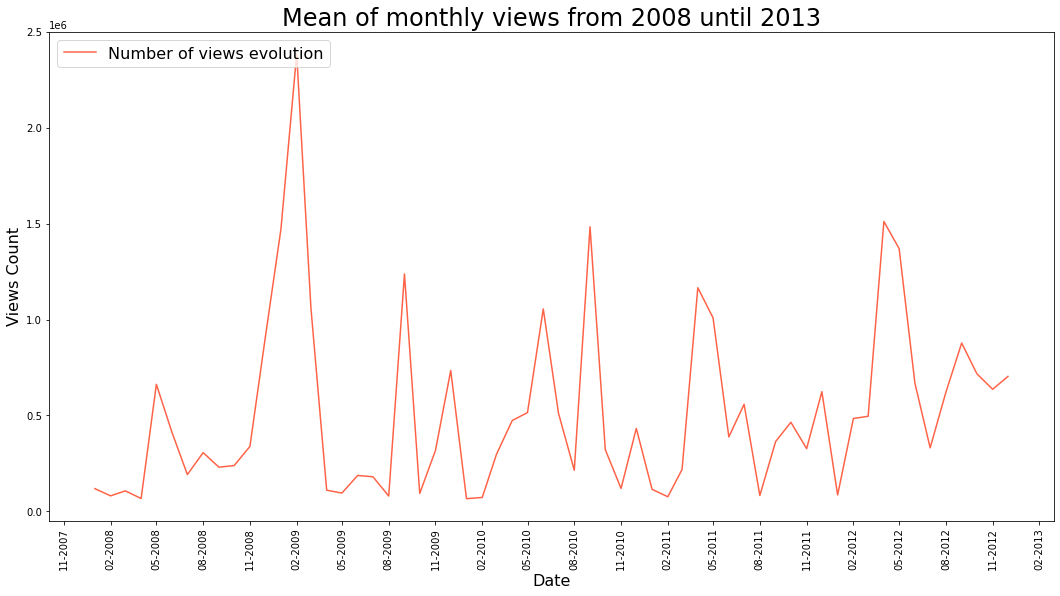

In [6]:
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(18, 9))
x = group_month.date
y = group_month.viewCount
ax.plot(x, y, color='tomato', label='Number of views evolution')
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%Y'))
plt.xticks(rotation=90)
ax.set_xlabel('Date', fontsize=16)
ax.set_ylabel('Views Count', fontsize=16)
ax.legend(loc = 'upper left', fontsize=16)
ax.set_title('Mean of monthly views from 2008 until 2013', fontsize=24)
#plt.savefig('Franc.png', dpi = 400, quality=100)
#plt.savefig('Aitor-beto.svg', dpi = 400, quality=100)
plt.show()
#plt.clf()

In [7]:
'''
df['likes_dislikes'] = df.likeCount / (df.dislikeCount + df.likeCount)
group_month = df.groupby(['year', 'month'], as_index = False).agg({'likes_dislikes': 'mean'})
#group_month
'''

"\ndf['likes_dislikes'] = df.likeCount / (df.dislikeCount + df.likeCount)\ngroup_month = df.groupby(['year', 'month'], as_index = False).agg({'likes_dislikes': 'mean'})\n#group_month\n"

In [8]:
'''
plt.figure(figsize=(17,6))
x = group_month.index
y = group_month.likes_dislikes
plt.bar(x, y, color='tomato', label='Nr of props built (LEGEND)')
plt.xlabel('Date', fontsize=16)
plt.ylabel('Views Count', fontsize=16)
plt.legend()
plt.title('Porcentage of likes throught the years')
#plt.savefig('Franc.png', dpi = 400, quality=100)
#plt.savefig('Aitor-beto.svg', dpi = 400, quality=100)
plt.show()
#plt.clf()'''

"\nplt.figure(figsize=(17,6))\nx = group_month.index\ny = group_month.likes_dislikes\nplt.bar(x, y, color='tomato', label='Nr of props built (LEGEND)')\nplt.xlabel('Date', fontsize=16)\nplt.ylabel('Views Count', fontsize=16)\nplt.legend()\nplt.title('Porcentage of likes throught the years')\n#plt.savefig('Franc.png', dpi = 400, quality=100)\n#plt.savefig('Aitor-beto.svg', dpi = 400, quality=100)\nplt.show()\n#plt.clf()"

In [9]:
a = Period(freq='D', year=2008, month=1, day=1)
a.strftime('%d-%b-%Y')

'01-Jan-2008'

In [51]:
original_2 = pd.read_csv("..\Vicky's work\data_output\HPbooks.csv")
df_book = original_2.copy()
df_book.Publishing_Date = df_book.Publishing_Date.astype('datetime64')

df_book.rename(columns = {'Publishing_Date':'date', 'Title':'Title_book'} , inplace = True)
df_book.drop(columns = 'Unnamed: 0', inplace = True)
df_book

,Title_book,Copies_Sold_approx,date
0,Harry Potter and the Deathly Hollows II,65000000,2007-07-01
1,Harry Potter and the Deathly Hollows I,65000000,2007-07-01
2,Harry Potter and the Half-Blood Prince,65000000,2005-07-01
3,Harry Potter and the Order of Phoenix,65000000,2003-06-01
4,Harry Potter and the Goblet of Fire,65000000,2000-07-01
5,Harry Potter and the Prisoner of Askaban,65000000,1999-07-01
6,Harry Potter and the Chamber of Secrets,77000000,1998-07-01
7,Harry Potter and the Sorcerers Stone,120000000,1997-06-01


In [56]:
original_3 = pd.read_csv("..\Vicky's work\data_output\HPmovies.csv")
df_movies = original_3.copy()

df_movies.Release_Date = df_movies.Release_Date.astype('datetime64')

df_movies.rename(columns = {'Release_Date':'date', 'Title':'Title_movies'} , inplace = True)
df_movies.drop(columns = 'Unnamed: 0', inplace = True)
df_movies

,date,Title_movies,Production_Budget,Opening_Weekend,Domestic_Boxoffice_Sales,Wordwide_Boxoffice_Sales,Dom_DVD_Sales,Dom_BRAY_Sales,Total_Dom_Video_Sales
0,2011-07-01,Harry Potter and the Deathly Hollows II,125000000,169189427,381193157,1341693157,102461187,60066364,162527551
1,2010-11-01,Harry Potter and the Deathly Hollows I,125000000,125017372,296131568,960431568,95762486,61118715,156881201
2,2009-07-01,Harry Potter and the Half-Blood Prince,250000000,77835727,302089278,935213767,148064710,51295786,199360496
3,2007-07-01,Harry Potter and the Order of Phoenix,150000000,77108414,292137260,943076457,254270750,5206421,259477171
4,2005-11-01,Harry Potter and the Goblet of Fire,150000000,102685961,290201752,897099794,542640844,6237064,548877908
5,2004-06-01,Harry Potter and the Prisoner of Askaban,130000000,93687367,249757726,795616337,0,0,0
6,2002-11-01,Harry Potter and the Chamber of Secrets,100000000,88357488,262233381,879225135,0,0,0
7,2001-11-01,Harry Potter and the Sorcerers Stone,125000000,90294621,317871467,975047606,0,0,0


In [65]:
merge = pd.merge(df_book, df_movies, on = 'date', how = 'outer')
merge.sort_values(by = 'date', ascending = True, inplace = True)
final_merge = pd.merge(group_month, merge, on = 'date', how = 'outer')
final_merge.to_csv('final_merged_harrypotter_trailer.csv')

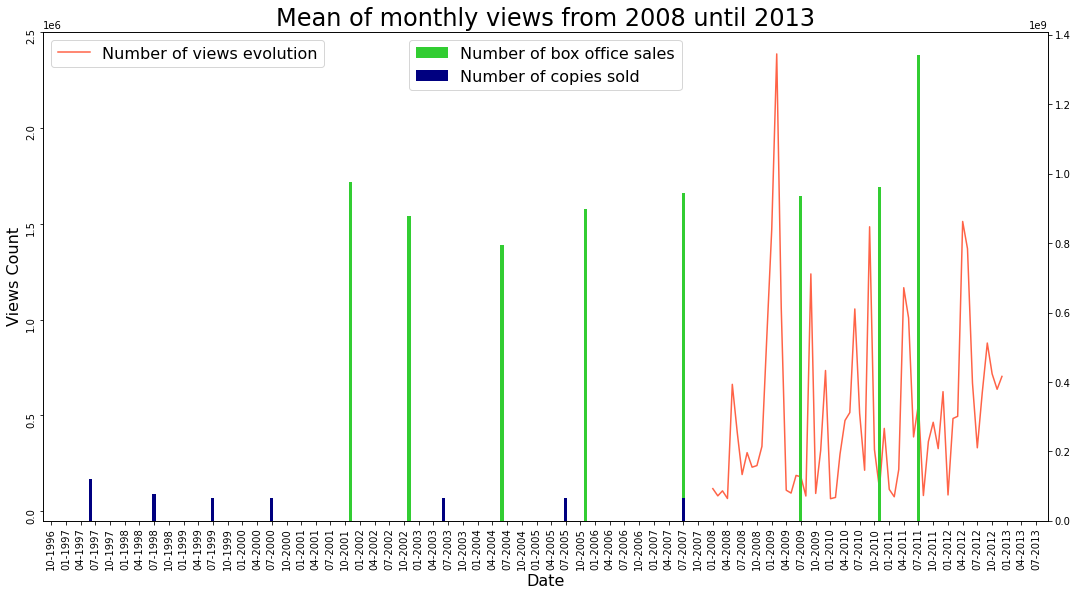

In [66]:
fig, ax1 = plt.subplots(figsize=(18, 9))
ax2 = ax1.twinx()
x = final_merge.date
y1 = final_merge.viewCount
y2 = final_merge.Wordwide_Boxoffice_Sales
y3 = final_merge.Copies_Sold_approx
ax1.plot(x, y1, color='tomato', label='Number of views evolution')
ax2.bar(x, y2, color = 'limegreen', width = 20, label='Number of box office sales')
ax2.bar(x, y3, color = 'navy', width = 20, label='Number of copies sold')
ax2.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%m-%Y'))
ax1.set_xlabel('Date', fontsize=16)
ax1.set_ylabel('Views Count', fontsize=16)
ax1.legend(loc = 'upper left', fontsize=16)
ax2.legend(loc = 'upper center', fontsize=16)
ax1.set_title('Mean of monthly views from 2008 until 2013', fontsize=24)
ax1.tick_params(labelrotation=90)
#plt.savefig('Franc.png', dpi = 400, quality=100)
#plt.savefig('Aitor-beto.svg', dpi = 400, quality=100)
plt.show()
#plt.clf()